# Log Likelihood Maximization: Optimization of the Mean Value with Gradient Ascent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

np.random.seed(42)

In [2]:
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [3]:
%matplotlib inline

In [4]:
plt.rcParams.update({'font.size': 14, 'figure.figsize': (20,9)})

### Gaussian
$\mathcal{N}(x|\mu,\sigma^2) = \frac{1}{(2\pi\sigma^2)^{1/2}}\exp\{-\frac{1}{2\sigma^2}(x-\mu)^2\}$

In [5]:
def gauss_distribution(mu, sigma, x):
    return np.divide(1, np.sqrt(2 * np.pi * np.power(sigma, 2))) * np.exp(np.divide(-1, 2 * np.pi * np.power(sigma, 2)) * np.power((x - mu), 2))

In [6]:
# mean = loc, scale = std, size = number of samples
samples = np.random.normal(loc=2, scale=5, size=400)

Mean value and std based on the given samples:

In [7]:
print('Mean: {}'.format(np.mean(samples)))
print('Std: {}'.format(np.std(samples)))

Mean: 2.112743054316979
Std: 4.795517212011538


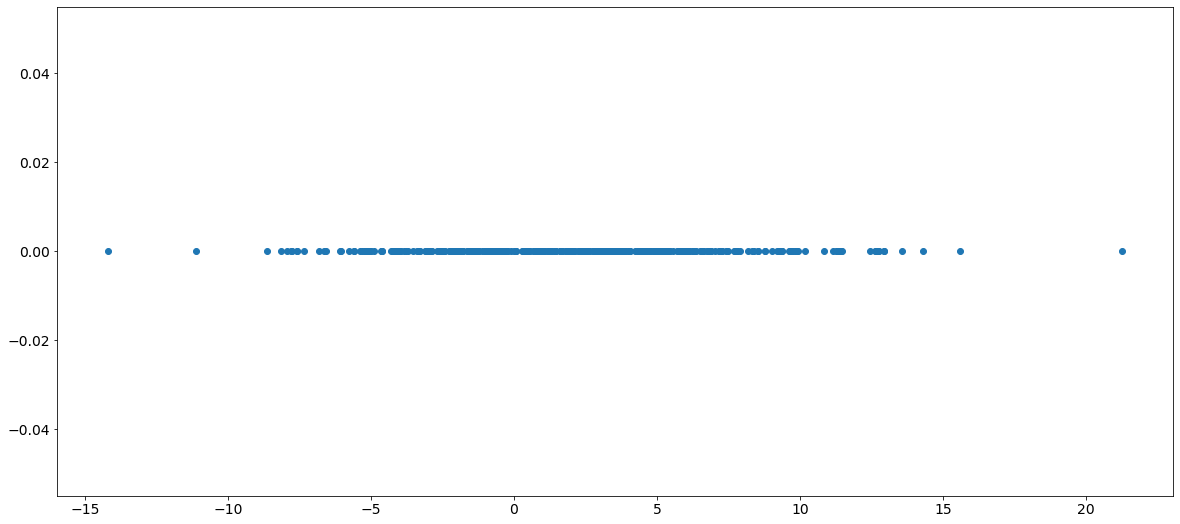

In [8]:
plt.scatter(samples, [0] * len(samples))
plt.show()

### Likelihood function for the Gaussian
which is the probabilty of the data given by the $\mu$ and $\sigma^2$ <br>

$p(\textbf{x}|\mu, \sigma^2) = \prod\limits_{n=1}^{N}\mathcal{N}(x_n|\mu, \sigma^2)$ <br>

Find the parameters which maximizes the function. But, it is easier to compute the derivatives by utilizing the $\log$ function.

### Log-Likelihood function
$\ln p(\textbf{x}|\mu, \sigma^2) = -\frac{1}{2\sigma^2}\sum\limits_{i=1}^{n}(x_i - \mu)^2 - \frac{N}{2}\ln (2\pi) - \frac{N}{2}\ln(\sigma^2)$ <br>

\begin{align}
     \frac{\partial}{\partial\mu} \ln p(\textbf{x}|\mu, \sigma^2)
     &= -\frac{1}{2\sigma^2} \cdot 2 \cdot (-1) \cdot \sum\limits_{i=1}^{n}(x_i - \mu) \newline
     &= \frac{1}{\sigma^2} \cdot \sum\limits_{i=1}^{n} (x_i - \mu)
\end{align}
The gradient for the sample mean is given by: $\frac{\partial}{\partial\mu} \ln p(\textbf{x}|\mu, \sigma^2) = \frac{1}{\sigma^2} \cdot \sum\limits_{i=1}^{n} (x_i - \mu)$ <br>

The analytical solution for the mean is:
\begin{align}
    \frac{\partial}{\partial\mu} \ln p(\textbf{x}|\mu, \sigma^2) &= 0 \newline
    \frac{1}{\sigma^2} \cdot \sum\limits_{i=1}^{n} (x_i - \mu) &= 0 \newline
    \frac{1}{\sigma^2} (\cdot \sum\limits_{i=1}^{n} x_i - n \cdot \mu) &= 0 \newline
    \sum\limits_{i=1}^{n} x_i - n \cdot \mu &= 0 \newline
    \sum\limits_{i=1}^{n} x_i &= n \cdot \mu \newline
    \mu &= \frac{1}{n}\cdot \sum\limits_{i=1}^{n} x_i \newline
\end{align}

Compute the gradient of $\mu$

In [9]:
def compute_gradient_for_mean(current_mean, current_sigma, current_samples, gradient):
    gradient = np.divide(np.sum(current_samples - current_mean), np.power(current_sigma, 2))
    return gradient

## Optimize the Log-Likelihood Function with Gradient Ascent

In [10]:
mean_vals = []

iterations = 150
# use the actual standard deviation to show the effect for the mean value
current_sigma = np.std(samples)
current_mean = -10.0  # visulaization purpose
epsilon = 0.001  # 
current_gradient = 0.0
lambda_val = 0.1

mean_vals.append(current_mean)

for i in range(iterations):
    current_gradient = compute_gradient_for_mean(current_mean, current_sigma, samples, current_gradient)
    current_mean = current_mean + lambda_val * current_gradient
    mean_vals.append(current_mean)
    if i % 10 == 0:
        print('Iteration: {}, Mean: {}'.format(i, current_mean))
    if np.abs(np.mean(samples) - current_mean) < epsilon:  # test
        print('Done in iteration: {}'.format(i))
        break
print()
print("Mean by gradient ascent: {}".format(current_mean))
print("Mean (analytical solution): {}".format(np.mean(samples)))

Iteration: 0, Mean: 11.068401584180776
Iteration: 10, Mean: 2.549910424583224
Iteration: 20, Mean: 2.1340832281286763
Iteration: 30, Mean: 2.1137847675126276
Done in iteration: 31

Mean by gradient ascent: 2.1119728548977017
Mean (analytical solution): 2.112743054316979


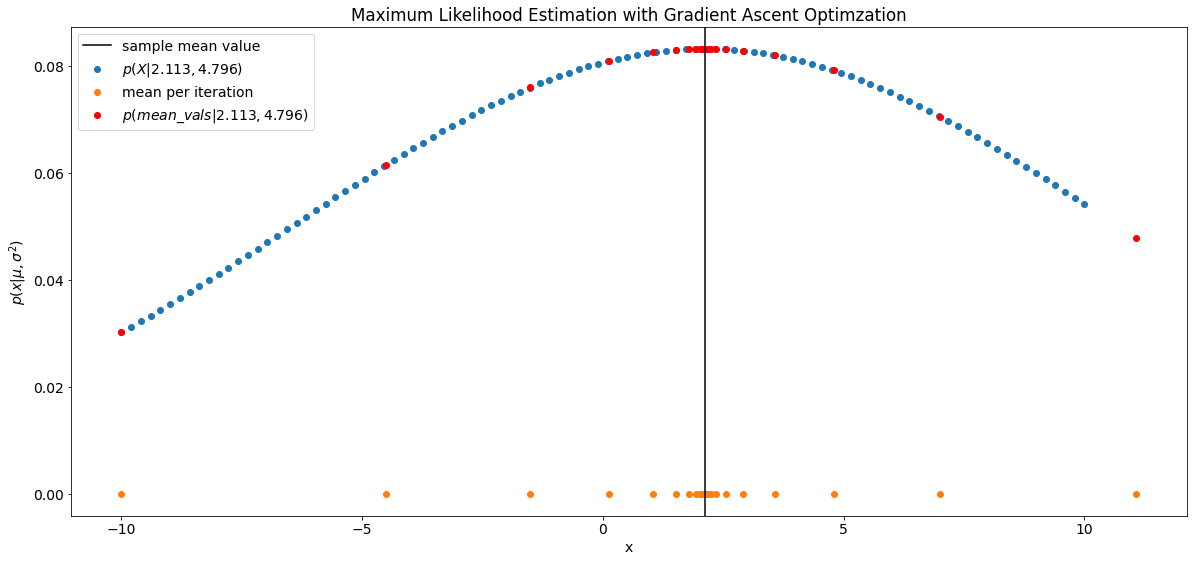

In [11]:
n = 100
mu, sigma = mean_vals[-1], current_sigma

x = np.linspace(-10, 10, n)
y = gauss_distribution(mu, sigma, x)

x_means = [0] * len(mean_vals)
y_means_per_iter = gauss_distribution(mu, sigma, np.array(mean_vals))

plt.scatter(x, y, label=r'$p(X|2.113, 4.796)$')
plt.scatter(mean_vals, x_means, label='mean per iteration')
plt.scatter(mean_vals, y_means_per_iter, label=r'$p(mean\_vals|2.113, 4.796)$', color='red')
plt.axvline(np.mean(samples), color='black', label='sample mean value')
plt.xlabel('x')
plt.ylabel(r'$p(x|\mu, \sigma^2)$')
plt.legend()
plt.title('Maximum Likelihood Estimation with Gradient Ascent Optimzation')
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()

#### Source:
* Bishop, Christopher M. Pattern recognition and machine learning. springer, 2006.
* https://web.stanford.edu/class/archive/cs/cs109/cs109.1192/lectureNotes/22%20-%20GradientAscent.pdf